**Huffman Tree Intro**

- Given symbols and associated weights
- Compressed storage as a binary tree
- Higher weighted symbols have fewer bits
- Each bit represents a decision down the tree

<br>

![image](images/huffman_example.png)

**Priority Queue Intro**
- Lower value items have higher priority and are retrieved first


In [1]:
from Queue import PriorityQueue

pq = PriorityQueue()
pq.put(.2)
pq.put(.05)
pq.put(.4)
pq.put(.35)

In [2]:
while pq.qsize() > 0:
    print pq.get()

0.05
0.2
0.35
0.4


**Huffman Tree Implementation**
- Create a Node class and make every item a Node with `name` and `weight`
- Put all nodes in a priority queue
- While queue is not empty
    - Pop two elements (`N1` and `N2`) from queue
    - Assign a new node with childrean `N1` and `N2`
    - Assign new node weight to be sum of `N1` and `N2`

In [3]:
# For plotting Trees
import pydot
from skimage import io
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [4]:
class Node(object):
    def __init__(self, name, weight):
        self.name = name
        self.weight = weight
        self.left = None
        self.right = None
        
    def __cmp__(self, node):
        return cmp(self.weight, node.weight)

In [5]:
def dict2queue(d, q=None):
    if q is None:
        q = PriorityQueue()
    for name, weight in d.iteritems():
        node = Node(name, weight)
        q.put(node)
    return q

In [6]:
def build_tree(q):
    while q.qsize() > 1:
        item1 = q.get()
        item2 = q.get()
        parent = Node(None, item1.weight + item2.weight)
        parent.left = item1
        parent.right = item2
        q.put(parent)
    return q.get()

In [7]:
def build_code(root_node):
    codes = {}
    graph = pydot.Dot(graph_type='digraph')
    
    def traverse_tree(node, prefix=''):
        if node.name:
            codes[node.name] = prefix
        else:
            edge = pydot.Edge(str(node.weight), str(node.left.weight), label='0')
            edge2 = pydot.Edge(str(node.weight), str(node.right.weight), label='1')
            graph.add_edge(edge)
            graph.add_edge(edge2)
            traverse_tree(node.right, prefix + '1')
            traverse_tree(node.left, prefix + '0')
            
    traverse_tree(root_node)
    graph_fname = 'images/graph.png'
    graph.write_png(graph_fname)
    plt.show()
    return codes, graph_fname

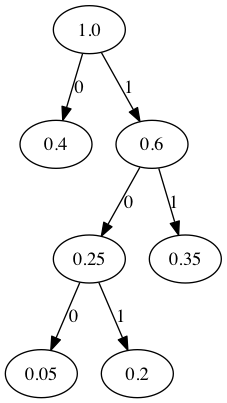

In [8]:
d = {'a1': .4, 'a2': .35, 'a3': .2, 'a4': .05}
q = dict2queue(d)
root_node = build_tree(q)
codes, graph_fname = build_code(root_node)
Image(graph_fname)

In [9]:
codes

{'a1': '0', 'a2': '11', 'a3': '101', 'a4': '100'}

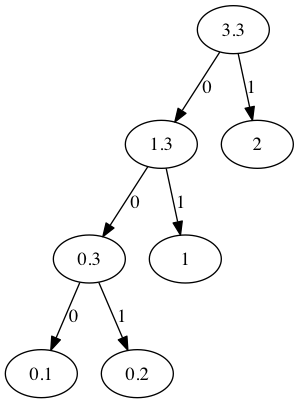